<a href="https://colab.research.google.com/github/Sunn24/Orthogonal-equipartitions-project/blob/main/Orthogonal%20equipartitions%20of%203-color%20points%20in%20the%20plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#0000B0>Partition to $2$ regions of $n$ - color points</font>

<!-- **<font color="OrangeRed">Algorithm :</font>**
* a
* b -->

## <font color=#2a9df4>Introduction</font>

In [ ]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

### <font color=#f17a3d>Random points</font>

In [ ]:
def Arbitrary_random(n,k):
  points=[[] for element in range(k)]
  for i in range(n):
    for j in range(n):
      c=np.random.choice(k+1, 1, p=[k/(k**2+1)]*k+[1/(k**2+1)]).item()
      if c==k:
        continue
      else:
        points[c].append((i,j))
  return points

def Collinear_random(n,k):
  c=[]
  for i in range(2):
    a=np.random.permutation(n)
    b=np.random.permutation(n)
    c.append(np.concatenate((a, b), axis=None).tolist())
  d=list(set(zip(c[0],c[1])))
  points=[[] for element in range(k)]
  for i,j in d:
    c=np.random.choice(k+1, 1, p=[k/(k**2+1)]*k+[1/(k**2+1)]).item()
    if c==k:
      continue
    else:
      points[c].append((i,j))
  return points

def Collinear_random_np(n,k):
  c=np.unique(np.floor_divide(np.stack((np.random.permutation(2*n), np.random.permutation(2*n)), axis=-1),2),axis=0)
  e=np.random.choice(k+1, len(c), p=[k/(k**2+1)]*k+[1/(k**2+1)])
  points=np.insert(c,2,e,axis=1)
  return points

### <font color=#f17a3d>Plotting in plane</font>

In [ ]:
def plotting(points,k):
  color=['go','bo','ro','co','mo','yo','ko']
  for n in range(len(points)):
    for i,j in points[n]:
      # ax.plot(i,j,color[n],markersize=0.5)
      ax.plot(i,j,color[n],markersize=2)
  return points

def plotting_np(points,k):
  color=['go','bo','ro','co','mo','yo','ko']
  for x,y,z in points:
    if z==k:
      continue
    ax.plot(x,y,color[z],markersize=1)
  return points[points[:,2]<k]

## <font color=#2a9df4>Algorithm</font>

### <font color=#f17a3d>3 Vertical lines and 2 Horizontal lines</font>

In [ ]:
def threeverticalpartitions(setlist,n):
  colors=['green','blue','red','cyan','magenta','yellow','black']
  ####### Y-Axis #######
  ax.set_title(str(n)+'-colors with 3 vertical segments and 2 Horizontal segments', fontsize=10)
  points=np.zeros([n,num_points+1,num_points+1],dtype=int) ##[color][y][x] initial at [*][n+1][-1]
  for i,j,k in setlist:
    points[k][num_points-j]=np.add(points[k][num_points-j],[0]*(i+1)+[1]*(num_points-i))
  sumpoint=np.array(np.sum(points,axis=1))
  for i in range(len(sumpoint[0])):
    if all(sumpoint[:,i]>=np.floor(sumpoint[:,-1]/2)):
      ax.axvline(x=i-0.6,color = 'r', linestyle = '--', linewidth=1, alpha=0.5)
      mainindex=i
      break

  ## right-side box ##
  legend_elements= [Line2D([0], [0], marker='o', color='w', label=sumpoint[j][-1] ,markerfacecolor=colors[j], markersize=5) for j in range(n)]
  legend_elements+= [Line2D([0], [0], marker='o', color='w', label=int(abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))) ,markerfacecolor=colors[j], markersize=5) if abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))==int(abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))) else Line2D([0], [0], marker='o', color='w', label=str(int(abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))))+u"\u00B1"+str(0.5),markerfacecolor=colors[j], markersize=5) for j in range(n)]
  leg1=ax.legend(handles=legend_elements,
      loc='center left',
      bbox_to_anchor=(1.01, 0.5),
      ncol=2,
      fancybox=True,
      shadow=True,
      title='Number of points'
  )
  copypoint=points
  for index in range(mainindex,len(points[0])):
    if np.all(abs(sumpoint[:,-1]/2-sumpoint[:,index])<=0.5):
      return True
    points=np.subtract(points,np.transpose(np.array([points[:,:,index]]),(1,2,0)))
    for i in range(index-1,-1,-1): #แนวนอน
      for j in range(len(points[0])): #แนวตั้ง
        for l in range(j-1,-1,-1):
          minus=np.sum(np.array([points[:,l:j,i]]),axis=2) # ลบจำนวนในแต่ละสี
          if np.any(abs(sumpoint[:,-1]/2-sumpoint[:,index])+minus[0][:]<=-1):
            break
          if np.all(abs(sumpoint[:,-1]/2-sumpoint[:,index]-minus[0][:])<=0.5):
            ax.plot([index-0.6,index-0.6,i-0.4,i-0.4,index-0.6,index-0.6],[-1,len(points[0])-j-0.4,len(points[0])-j-0.4,len(points[0])-l-0.4,len(points[0])-l-0.4,len(points[0])] ,color = 'k', linestyle = '-', linewidth=0.4, alpha=1)
            return True
      for j in range(len(points[0])): #แนวตั้ง
        for l in range(j-1,-1,-1):
          minus=np.add(np.sum(np.array([points[:,0:l,i]]),axis=2),np.sum(np.array([points[:,j:num_points+1,i]]),axis=2))
          if np.any(abs(sumpoint[:,-1]/2-sumpoint[:,index])+minus[0][:]<=-1):
            break
          if np.all(abs(sumpoint[:,-1]/2-sumpoint[:,index]-minus[0][:])<=0.5):
            ax.plot([i-0.4,i-0.4,index-0.6,index-0.6,i-0.4,i-0.4],[-1,len(points[0])-j-0.4,len(points[0])-j-0.4,len(points[0])-l-0.4,len(points[0])-l-0.4,len(points[0])] ,color = 'k', linestyle = '-', linewidth=0.4, alpha=1)
            return True
      if i==0:
        points=copypoint

  ####### X-Axis #######
  ax.set_title(str(n)+'-colors with 2 vertical segments and 3 Horizontal segments', fontsize=10)
  leg1=ax.legend(handles=legend_elements,
      loc='upper left',
      bbox_to_anchor=(1.01, 1),
      ncol=2,
      fancybox=True,
      shadow=True,
      title='Number of points'
  )
  points=np.zeros([n,num_points+1,num_points+1],dtype=int) ##[color][y][x] initial at [*][n+1][-1]
  for j,i,k in setlist:
    points[k][num_points-j]=np.add(points[k][num_points-j],[0]*(i+1)+[1]*(num_points-i))
  sumpoint=np.array([np.sum(points[i],axis=0) for i in range(n)])
  for i in range(len(sumpoint[0])):
    if all(sumpoint[:,i]>=np.floor(sumpoint[:,-1]/2)):
      ax.axhline(y=i-0.6,color = 'r', linestyle = '--', linewidth=1, alpha=0.5)
      mainindex=i
      break
  ## right-side box ##
  legend_elements= [Line2D([0], [0], marker='o', color='w', label=sumpoint[j][-1] ,markerfacecolor=colors[j], markersize=5) for j in range(n)]
  legend_elements+= [Line2D([0], [0], marker='o', color='w', label=int(abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))) ,markerfacecolor=colors[j], markersize=5) if abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))==int(abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))) else Line2D([0], [0], marker='o', color='w', label=str(int(abs(sumpoint[j][mainindex]-(sumpoint[j][-1]/2))))+u"\u00B1"+str(0.5),markerfacecolor=colors[j], markersize=5) for j in range(n)]
  leg2=ax.legend(handles=legend_elements,
      loc='lower left',
      bbox_to_anchor=(1.01, 0),
      ncol=2,
      fancybox=True,
      shadow=True,
      title='Number of points\n with Horizontal line'
  )
  plt.setp(leg2.get_title(), multialignment='center')
  ax.add_artist(leg1)
  copypoint=points
  for index in range(mainindex,len(points[0])):
    points=np.subtract(points,np.transpose(np.array([points[:,:,index]]),(1,2,0)))
    if np.all(abs(sumpoint[:,-1]/2-sumpoint[:,index])<=0.5):
      return True
    for i in range(index-1,-1,-1): #แนวนอน
      for j in range(len(points[0])): #แนวตั้ง
        for l in range(j-1,-1,-1):
          minus=np.sum(np.array([points[:,l:j,i]]),axis=2)
          if np.any(abs(sumpoint[:,-1]/2-sumpoint[:,index])+minus[0][:]<=-1):
            break
          if np.all(abs(sumpoint[:,-1]/2-sumpoint[:,index]-minus[0][:])<=0.5):
            ax.plot([-1,len(points[0])-j-0.4,len(points[0])-j-0.4,len(points[0])-l-0.4,len(points[0])-l-0.4,len(points[0])],[index-0.6,index-0.6,i-0.4,i-0.4,index-0.6,index-0.6] ,color = 'k', linestyle = '-', linewidth=0.4, alpha=1)
            return True
      for j in range(len(points[0])): #แนวตั้ง
        for l in range(j-1,-1,-1):
          minus=np.add(np.sum(np.array([points[:,0:l,i]]),axis=2),np.sum(np.array([points[:,j:num_points+1,i]]),axis=2))
          if np.any(abs(sumpoint[:,-1]/2-sumpoint[:,index])+minus[0][:]<=-1):
            break
          if np.all(abs(sumpoint[:,-1]/2-sumpoint[:,index]-minus[0][:])<=0.5):
            ax.plot([-1,len(points[0])-j-0.4,len(points[0])-j-0.4,len(points[0])-l-0.4,len(points[0])-l-0.4,len(points[0])],[i-0.4,i-0.4,index-0.6,index-0.6,i-0.4,i-0.4] ,color = 'k', linestyle = '-', linewidth=0.4, alpha=1)
            return True
      if i==0:
        points=copypoint
  fig.patch.set_facecolor("xkcd:light rose")
  failure.append(setlist)
  return False

### <font color=#f17a3d>2 Vertical lines and 1 Horizonal line</font>

In [ ]:
def twoverticalpartitions(setlist,n):
  colors=['green','blue','red','cyan','magenta','yellow','black']
  ####### Y Axis #######
  ax.set_title(str(n)+'-colors with 2 vertical segments and 1 Horizontal segments', fontsize=10)
  points=np.zeros([n,num_points+1,num_points+1],dtype=int) ##[color][y][x] initial at [*][n+1][-1]
  for i,j,k in setlist:
    points[k][num_points-j]=np.add(points[k][num_points-j],[0]*(i+1)+[1]*(num_points-i))
  sumpoint=np.array([np.sum(points[i],axis=0) for i in range(n)])
  for i in range(len(sumpoint[0])):
    if all([sumpoint[j][i]>=math.floor(sumpoint[j][-1]/2) for j in range(len(sumpoint))]):
      ax.axvline(x=i-0.6,color = 'r', linestyle = '--', linewidth=1, alpha=0.5)
      mainindex=i
      legend_elements= [Line2D([0], [0], marker='o', color='w', label=sumpoint[j][-1] ,markerfacecolor=colors[j], markersize=5) for j in range(n)]
      legend_elements+= [Line2D([0], [0], marker='o', color='w', label=int(abs(sumpoint[j][i]-(sumpoint[j][-1]/2))) ,markerfacecolor=colors[j], markersize=5) if abs(sumpoint[j][i]-(sumpoint[j][-1]/2))==int(abs(sumpoint[j][i]-(sumpoint[j][-1]/2))) else Line2D([0], [0], marker='o', color='w', label=str(int(abs(sumpoint[j][i]-(sumpoint[j][-1]/2))))+u"\u00B1"+str(0.5),markerfacecolor=colors[j], markersize=5) for j in range(n)]
      leg1=ax.legend(handles=legend_elements,
          loc='center left',
          bbox_to_anchor=(1.01, 0.5),
          ncol=2,
          fancybox=True,
          shadow=True,
          title='Number of points'
      )
      break
  copypoint=points
  for index in range(mainindex,len(points[0])):
    points=np.subtract(points,np.transpose(np.array([points[:,:,index]]),(1,2,0)))
    if all([abs(sumpoint[j][-1]/2-sumpoint[j][index])<=0.5 for j in range(len(sumpoint))]):
      return True
    for i in range(index-1,-1,-1): #แนวนอน
      for j in range(len(points[0])): #แนวตั้ง
        minus=np.sum(np.array([points[:,:j,i]]),axis=2)
        if np.all([abs(sumpoint[m][-1]/2-sumpoint[m][index]-minus[0][m])<=0.5 for m in range(len(sumpoint))]):
          ax.plot([index-0.6,index-0.6],[-1,len(points[0])-j-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([index-0.6,i-0.4],[len(points[0])-j-0.4,len(points[0])-j-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([i-0.4,i-0.4],[len(points[0])-j-0.4,len(points[0])] ,color = 'k', linestyle = '-', linewidth=0.5)
          return True
        minus=np.sum(np.array([points[:,j:,i]]),axis=2)
        if np.all([abs(sumpoint[m][-1]/2-sumpoint[m][index]-minus[0][m])<=0.5 for m in range(len(sumpoint))]):
          ax.plot([i-0.4,i-0.4],[-1,len(points[0])-j-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([index-0.6,i-0.4],[len(points[0])-j-0.4,len(points[0])-j-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([index-0.6,index-0.6],[len(points[0])-j-0.4,len(points[0])] ,color = 'k', linestyle = '-', linewidth=0.5)
          return True
      if i==0:
        points=copypoint

  ####### X Axis #######
  ax.set_title(str(n)+'-colors with 1 vertical segments and 2 Horizontal segments', fontsize=10)
  leg1=ax.legend(handles=legend_elements,
      loc='upper left',
      bbox_to_anchor=(1.01, 1),
      ncol=2,
      fancybox=True,
      shadow=True,
      title='Number of points'
  )
  points=np.zeros([n,num_points+1,num_points+1],dtype=int) ##[color][y][x] initial at [*][n+1][-1]
  for j,i,k in setlist:
    points[k][num_points-j]=np.add(points[k][num_points-j],[0]*(i+1)+[1]*(num_points-i))
  sumpoint=np.array([np.sum(points[i],axis=0) for i in range(n)])
  for i in range(len(sumpoint[0])):
    if all([sumpoint[j][i]>=math.floor(sumpoint[j][-1]/2) for j in range(len(sumpoint))]):
      ax.axhline(y=i-0.6,color = 'r', linestyle = '--', linewidth=1, alpha=0.5)
      mainindex=i
      legend_elements= [Line2D([0], [0], marker='o', color='w', label=sumpoint[j][-1] ,markerfacecolor=colors[j], markersize=5) for j in range(n)]
      legend_elements+= [Line2D([0], [0], marker='o', color='w', label=int(abs(sumpoint[j][i]-(sumpoint[j][-1]/2))) ,markerfacecolor=colors[j], markersize=5) if abs(sumpoint[j][i]-(sumpoint[j][-1]/2))==int(abs(sumpoint[j][i]-(sumpoint[j][-1]/2))) else Line2D([0], [0], marker='o', color='w', label=str(int(abs(sumpoint[j][i]-(sumpoint[j][-1]/2))))+u"\u00B1"+str(0.5),markerfacecolor=colors[j], markersize=5) for j in range(n)]
      leg2=ax.legend(handles=legend_elements,
          loc='lower left',
          bbox_to_anchor=(1.01, 0),
          ncol=2,
          fancybox=True,
          shadow=True,
          title='Number of points\n with Horizontal line'
      )
      plt.setp(leg2.get_title(), multialignment='center')
      ax.add_artist(leg1)
      break
  copypoint=points
  for index in range(mainindex,len(points[0])):
    points=np.subtract(points,np.transpose(np.array([points[:,:,index]]),(1,2,0)))
    if all([abs(sumpoint[j][-1]/2-sumpoint[j][index])<=0.5 for j in range(len(sumpoint))]):
      return True
    for i in range(index-1,-1,-1): #แนวนอน
      for j in range(len(points[0])): #แนวตั้ง
        minus=np.sum(np.array([points[:,:j,i]]),axis=2)
        if np.all([abs(sumpoint[m][-1]/2-sumpoint[m][index]-minus[0][m])<=0.5 for m in range(len(sumpoint))]):
          ax.plot([-1,len(points[0])-j-0.4],[index-0.6,index-0.6] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([len(points[0])-j-0.4,len(points[0])-j-0.4],[index-0.6,i-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([len(points[0])-j-0.4,len(points[0])],[i-0.4,i-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          return True
        minus=np.sum(np.array([points[:,j:,i]]),axis=2)
        if np.all([abs(sumpoint[m][-1]/2-sumpoint[m][index]-minus[0][m])<=0.5 for m in range(len(sumpoint))]):
          ax.plot([-1,len(points[0])-j-0.4],[i-0.4,i-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([len(points[0])-j-0.4,len(points[0])-j-0.4],[index-0.6,i-0.4] ,color = 'k', linestyle = '-', linewidth=0.5)
          ax.plot([len(points[0])-j-0.4,len(points[0])],[index-0.6,index-0.6] ,color = 'k', linestyle = '-', linewidth=0.5)
          return True
      if i==0:
        points=copypoint
  fig.patch.set_facecolor("xkcd:light rose")
  failure.append(setlist)
  return False

## <font color=#2a9df4>Results</font>

In [ ]:
failure=[]

True
0.20224499702453613


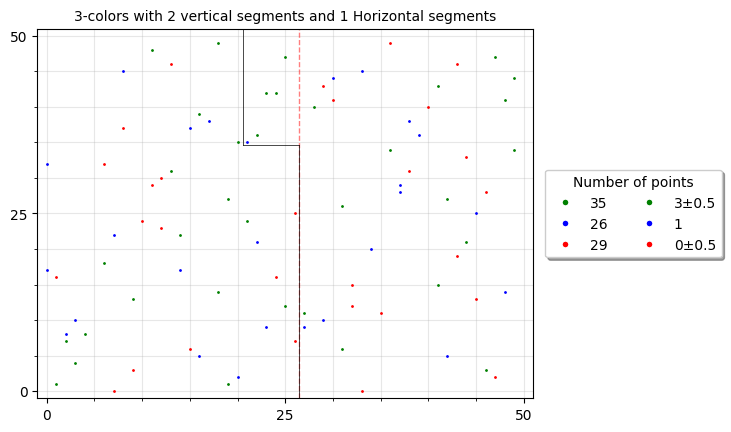

In [ ]:
start=time.time()
num_points=50
coloring=3
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-1, num_points+1])
ax.set_ylim([-1, num_points+1])
major_ticks = np.arange(0, num_points+1, math.floor(num_points/2))
minor_ticks = np.arange(0, num_points+1, math.floor(num_points/10))
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both', alpha=0.3)
# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.2)

randompoint=Collinear_random_np(num_points,coloring)
print(twoverticalpartitions(plotting_np(randompoint,coloring),coloring))
end=time.time()
print(end-start)
plt.show()

True
90.17323732376099


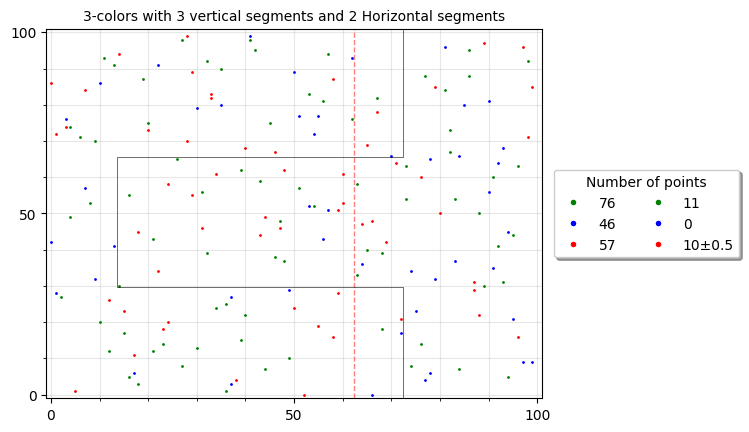

In [ ]:
start=time.time()
num_points=100
coloring=3
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-1, num_points+1])
ax.set_ylim([-1, num_points+1])
major_ticks = np.arange(0, num_points+1, math.floor(num_points/2))
minor_ticks = np.arange(0, num_points+1, math.floor(num_points/10))
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both', alpha=0.3)
# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.2)

randompoint=Collinear_random_np(num_points,coloring)
print(threeverticalpartitions(plotting_np(randompoint,coloring),coloring))
end=time.time()
print(end-start)
plt.show()

## Link to <a href="https://drive.google.com/drive/u/0/folders/1zYp89k3ZyQSCTqQ0mTaTcRB2sBa0tiuq">Google Drive</a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files= "/content/drive/MyDrive/Senior Project Drive"

In [ ]:
failure=[]
listofresult=[]

In [ ]:
### For delete specific file
#  !rm '/content/drive/MyDrive/Senior Project Drive/3-colors 20points using 3Vertical and 2Horizontal/True 3colors20x20_pic1.png'

In [ ]:
### For delete all files in folder
import os
path = "/content/drive/MyDrive/Senior Project Drive/3-colors 100points using 2Vertical and 1Horizontal/"
for file in os.listdir(path):
    os.remove(path+file)

In [ ]:
num_points=50
coloring=3
num_example=1000
# savefiles="/content/drive/MyDrive/Senior Project Drive/3-colors 50points using 3Vertical and 2Horizontal"
# savefiles="/content/drive/MyDrive/Senior Project Drive/5-colors 100points using 3Vertical and 2Horizontal"
for x in range(1,num_example+1):
# for x in range(21,101):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.set_xlim([-1, num_points+1])
  ax.set_ylim([-1, num_points+1])
  major_ticks = np.arange(0, num_points+1, math.floor(num_points/2))
  minor_ticks = np.arange(0, num_points+1, math.floor(num_points/10))
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  ax.grid(which='both', alpha=0.3)
  # ax.grid(which='minor', alpha=0.2)
  # ax.grid(which='major', alpha=0.2)
  randompoint=Collinear_random_np(num_points,coloring)
  result=threeverticalpartitions(plotting_np(randompoint,coloring),coloring)
  listofresult.append(result)
  # plt.savefig(f"{savefiles}/{result} {coloring}colors{num_points}x{num_points}_pic{x}.png", bbox_inches='tight',dpi=120)
  plt.close()

In [ ]:
all(listofresult)

False